In [84]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# change the following to %matplotlib notebook for interactive plotting
%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 6))
mpl.rc('image', cmap='gray')
import cv2


from scipy.fftpack import fft
from timeit import default_timer as timer
from math import sqrt
import pandas as pd
import trackpy as tp
from matplotlib import cm
pixel=7
micron=33.7
mpp=micron/pixel
mpp

from pandas import DataFrame, Series  # for convenience

import pims


In [101]:
frames=pims.Video('20d02.avi')
d0=pd.read_csv("20dexp1_02.csv")

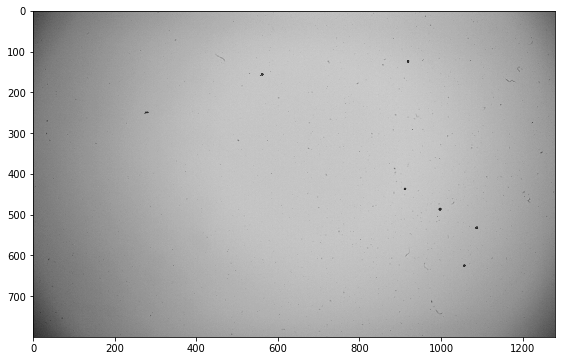

In [102]:
plt.imshow(frames[0])

Drawing multicolor lines takes awhile. Come back in a minute.


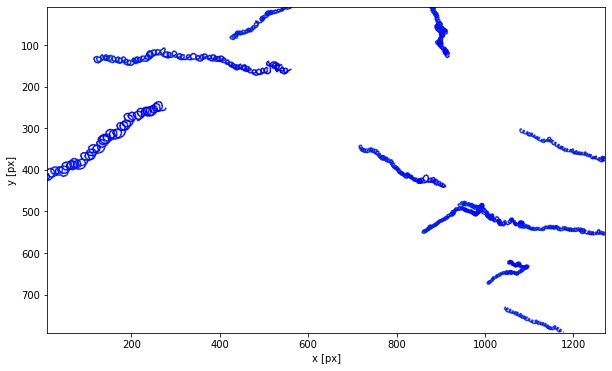

In [103]:
plt.figure()
tp.plot_traj(d0,colorby='frame');

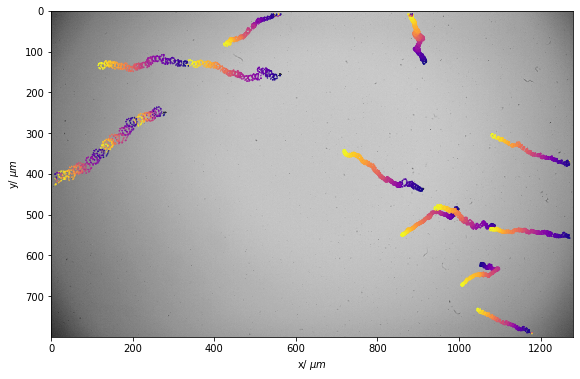

In [104]:
fig, ax = plt.subplots()

for i in list(set(d0["particle"])):
    d0i=d0[d0["particle"]==i]
    head=d0i['frame'].values[0]
    tail=d0i['frame'].values[-1]
    color=(d0i['frame'].values-head)/(tail-head)
    plt.scatter(d0i['x'],d0i['y'],linewidth=1,c=cm.plasma(color),s=0.2)
    #plt.plot(d0i['x'],d0i['y'],linewidth=1)
#plt.xlim(200,400)
#plt.ylim(0,200)
plt.imshow(frames[0])
plt.xlabel(r'x/ $\mu m$')
plt.ylabel(r'y/ $\mu m$')
ax.set_aspect('equal')


#plt.plot(t_20_1['x'],t_20_1['y'],linewidth=0.8,c=cm.plasma(0.2),label="20Hz")